In [31]:
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input

In [36]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

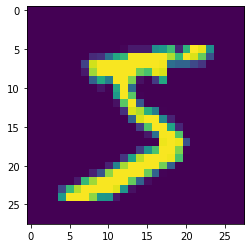

In [37]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [38]:
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)
X_train.shape

(60000, 784)

In [39]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [40]:
input_layer = Input(shape = (X_train.shape[1]))
bottleneck = Dense(32, activation='relu', name='bottleneck')(input_layer)
output = Dense(X_train.shape[1], activation='sigmoid', name='output')(bottleneck)

autoencoder = Model(input_layer, output)

autoencoder.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
bottleneck (Dense)           (None, 32)                25120     
_________________________________________________________________
output (Dense)               (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [41]:
encoder = Model(input_layer, bottleneck)
encoder.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
bottleneck (Dense)           (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [42]:
encoded_layer = Input(shape = (32, ), name = 'encoded_layer')
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_layer, decoder_layer(encoded_layer))
decoder.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoded_layer (InputLayer)   [(None, 32)]              0         
_________________________________________________________________
output (Dense)               (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


In [43]:
autoencoder.compile(loss = 'mse', optimizer='adam')

In [45]:
history = autoencoder.fit(X_train, X_train, epochs=20, batch_size=128)

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0550
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0261
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0185
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0150
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0129
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0118
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0112
Epoch 8/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0109
Epoch 9/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0107
Epoch 10/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0105
Epoch 11/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0105
Epoch 12/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0104
Epoch 13/20
469/469 [====

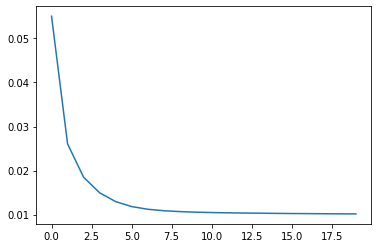

In [46]:
plt.plot(history.history['loss'])

In [49]:
encoded_data = encoder.predict(X_test, batch_size=512)
output_data = decoder.predict(encoded_data, batch_size=512)
output_data = output_data.reshape(output_data.shape[0], 28, 28)
output_data.shape

(10000, 28, 28)

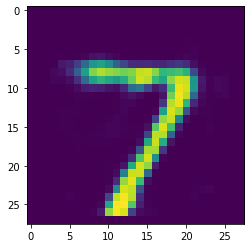

In [50]:
plt.imshow(output_data[0])

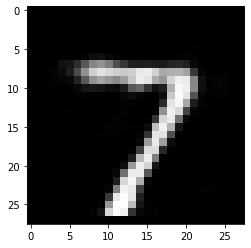

In [51]:
plt.imshow(output_data[0], cmap='gray')

In [52]:
X_test = X_test.reshape(10000, 28, 28)

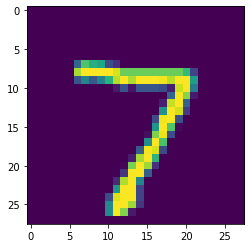

In [53]:
plt.imshow(X_test[0])

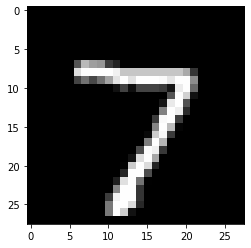

In [54]:
plt.imshow(X_test[0], cmap='gray')